## Sample classification with logisitc regression in Python

The data for this can be found https://www.kaggle.com/uciml/pima-indians-diabetes-database.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diabetes_data = pd.read_csv("../dataset/diabetes.csv")
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Preprocess

In [10]:
# You can do this if the Outcome is a string instead of a numeric
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

diabetes_data["Outcome"] = label_encoding.fit_transform(diabetes_data["Outcome"].astype(str))

In [8]:
diabetes_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
69,4,146,85,27,100,28.9,0.189,27,0
399,3,193,70,31,0,34.9,0.241,25,1
725,4,112,78,40,0,39.4,0.236,38,0
471,0,137,70,38,0,33.2,0.170,22,0
231,6,134,80,37,370,46.2,0.238,46,1
699,4,118,70,0,0,44.5,0.904,26,0
394,4,158,78,0,0,32.9,0.803,31,1
456,1,135,54,0,0,26.7,0.687,62,0
561,0,198,66,32,274,41.3,0.502,28,1
665,1,112,80,45,132,34.8,0.217,24,0


### Some plots

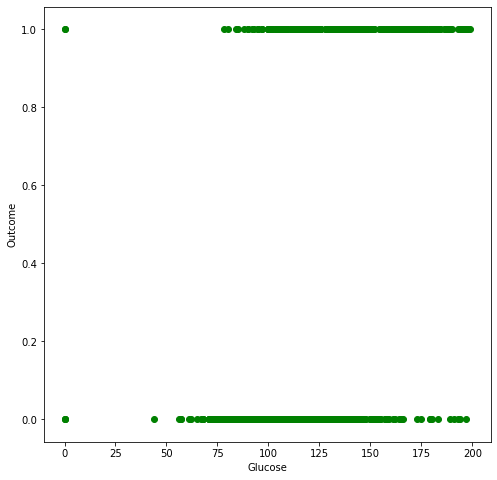

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(diabetes_data["Glucose"], diabetes_data["Outcome"], c="g")
plt.xlabel("Glucose")
plt.ylabel("Outcome")

plt.show()

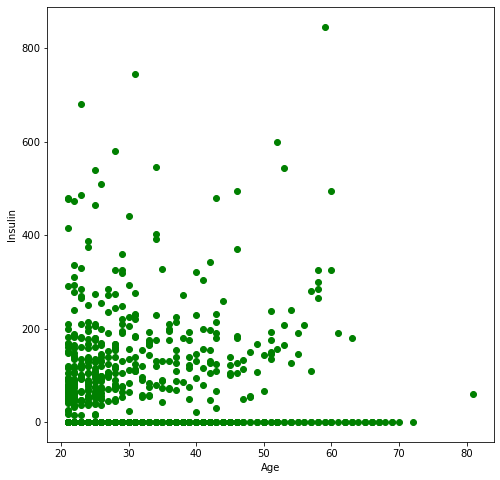

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(diabetes_data["Age"], diabetes_data["Insulin"], c="g")
plt.xlabel("Age")
plt.ylabel("Insulin")

plt.show()

In [13]:
diabetes_data_correlation = diabetes_data.corr()
diabetes_data_correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


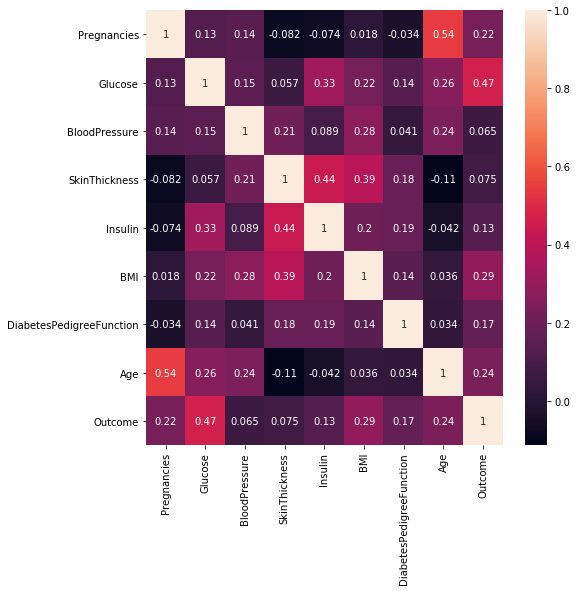

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(diabetes_data_correlation, annot=True)

plt.show()

#### Rescaling

In [19]:
features = diabetes_data.drop("Outcome", axis=1)

from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

In [22]:
features_scaled = standard_scaler.fit_transform(features)

features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [25]:
diabetes_data_scaled = pd.concat([features_scaled_df, diabetes_data["Outcome"]], axis=1)\
                                .reset_index(drop=True)

diabetes_data_scaled.to_csv("../dataset/diabetes_processed.csv")

### Model fit and prediction

In [35]:
from sklearn.model_selection import train_test_split

X = diabetes_data_scaled.drop("Outcome", axis=1)
Y = diabetes_data_scaled["Outcome"]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear' )

classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = classifier.predict(x_test)

In [45]:
pred_results = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
pred_results

,y_test,y_pred
271,0,0
0,1,1
567,0,0
736,0,0
170,1,0
...,...,...
338,1,1
174,0,0
540,1,0
530,0,0


### Evaluation

Using accuracy, recall and precision

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("How many of the predicted labels were correct?")
print("Accuracy: ", model_accuracy)
print("")

print("How many of the positive predictions were correct?")
print("Precision: ", model_precision)
print("")

print("How many of the individuals with diabetes in the dataset were correclty classified?")
print("Recall: ", model_recall)

How many of the predicted labels were correct?
Accuracy:  0.7532467532467533

How many of the positive predictions were correct?
Precision:  0.6615384615384615

How many of the individuals with diabetes in the dataset were correclty classified?
Recall:  0.5512820512820513
